# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key
import seaborn as sns
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_name = []
country = []
date = []
latitude = []
longitude = []
cloudiness = []
wind_speed = []
humidity = []
max_temp = []
record = 0
Set = 1 
current_city = ""
for city in cities:
    try:
    
        query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
        response = requests.get(query_url).json()
        current_city = city
        time.sleep(1.001)
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])        
        longitude.append(response["coord"]["lon"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])               
        humidity.append(response["main"]["humidity"])       
        max_temp.append(response["main"]["temp_max"])
        record += 1
        if record == 50:
            Set += 1
            record = 1 
        print(f"Processing Record {record} of Set {Set} | {current_city}")
    except:
        print("City not found....Skip")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tyukhtet
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | aranos
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | bethel
City not found....Skip
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | iqaluit
City not found....Skip
Processing Record 19 of Set 1 | gushi
City not found....Skip
Processing Record 20 of Set 1 | porto velho
Processing Record 21 of Set 1 | udankudi
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Set 1 | puert

Processing Record 40 of Set 4 | santarem
Processing Record 41 of Set 4 | sidi ali
Processing Record 42 of Set 4 | nueva loja
Processing Record 43 of Set 4 | balakhta
Processing Record 44 of Set 4 | upernavik
Processing Record 45 of Set 4 | luganville
Processing Record 46 of Set 4 | rotifunk
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | pacific grove
Processing Record 49 of Set 4 | nevers
Processing Record 1 of Set 5 | chapais
Processing Record 2 of Set 5 | vila do maio
Processing Record 3 of Set 5 | teruel
Processing Record 4 of Set 5 | vilyuysk
Processing Record 5 of Set 5 | puerto del rosario
City not found....Skip
Processing Record 6 of Set 5 | ribeira grande
City not found....Skip
Processing Record 7 of Set 5 | avera
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of Set 5 | basco
City not found....Skip
Processing Record 11 of Set 5 | ashikaga
Processing Record 12 of Set 5 | antropovo
Processing Record

Processing Record 35 of Set 8 | tongren
Processing Record 36 of Set 8 | lagoa
Processing Record 37 of Set 8 | vao
Processing Record 38 of Set 8 | ixtapa
City not found....Skip
Processing Record 39 of Set 8 | vostok
Processing Record 40 of Set 8 | kumluca
Processing Record 41 of Set 8 | khaga
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | el prat de llobregat
Processing Record 44 of Set 8 | barra do garcas
Processing Record 45 of Set 8 | chase
Processing Record 46 of Set 8 | staryy nadym
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | oktyabrskoye
Processing Record 49 of Set 8 | melo
Processing Record 1 of Set 9 | sola
Processing Record 2 of Set 9 | santa rosa
Processing Record 3 of Set 9 | hasanabad
Processing Record 4 of Set 9 | kandalaksha
City not found....Skip
Processing Record 5 of Set 9 | japura
Processing Record 6 of Set 9 | margate
City not found....Skip
Processing Record 7 of Set 9 | bogorodskoye
Processing Record 8 of Set 9 | c

Processing Record 25 of Set 12 | kupang
Processing Record 26 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 27 of Set 12 | llandrindod wells
Processing Record 28 of Set 12 | esperance
Processing Record 29 of Set 12 | kousseri
Processing Record 30 of Set 12 | kayes


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame ({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":latitude, 
    "Lng":longitude, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
})
weather_df.to_csv("../output_data/weather_df.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1579282156,71,-54.80,-68.30,51.80,36.91
1,Tyukhtet,100,RU,1579282233,91,56.54,89.30,21.96,19.73
2,Busselton,60,AU,1579282197,47,-33.65,115.33,66.99,14.52
3,Aranos,71,NA,1579282235,39,-24.13,19.12,79.68,27.69
4,Mataura,49,NZ,1579282176,94,-46.19,168.86,55.00,1.01


In [6]:
weather_df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

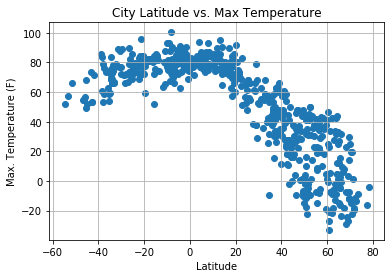

In [7]:

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show

plt.savefig("../output_data/max_lat.png")

#### Latitude vs. Humidity Plot

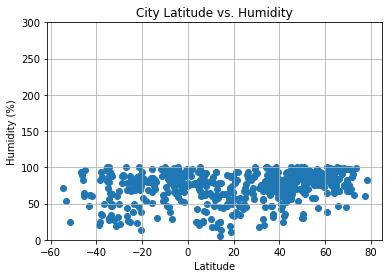

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim((0,300))
plt.grid(True)
plt.show
plt.savefig("../output_data/city_hum.png")

#### Latitude vs. Cloudiness Plot

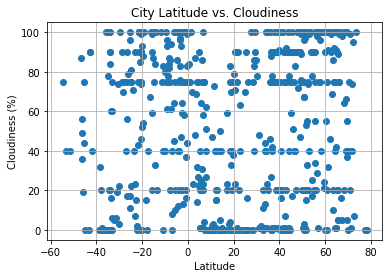

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
plt.savefig("../output_data/lat_cloud.png")

#### Latitude vs. Wind Speed Plot

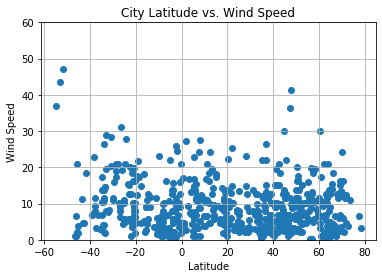

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.ylim((0,60))
plt.grid(True)
plt.show
plt.savefig("../output_data/lat_ws.png")

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_line(x, y, df, text, save):
    sns.lmplot(x, y, df)
    ax = plt.gca()
    ax.set_title(text)
    fig = ax.get_figure()
    fig.savefig(save)
    

In [31]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_df.loc[weather_df["Lat"]> 0]
south_hem =  weather_df.loc[weather_df["Lat"]< 0]
south_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1579282156,71,-54.80,-68.30,51.80,36.91
2,Busselton,60,AU,1579282197,47,-33.65,115.33,66.99,14.52
3,Aranos,71,NA,1579282235,39,-24.13,19.12,79.68,27.69
4,Mataura,49,NZ,1579282176,94,-46.19,168.86,55.00,1.01
5,Punta Arenas,40,CL,1579281881,54,-53.15,-70.92,57.20,43.62
...,...,...,...,...,...,...,...,...,...
548,Swan Hill,0,AU,1579282884,81,-35.34,143.55,59.00,3.00
549,Sehithwa,46,BW,1579282885,38,-20.47,22.72,81.81,6.17
560,Mpika,100,ZM,1579282898,98,-11.83,31.45,63.46,3.51
563,Kupang,80,ID,1579282902,100,-10.17,123.58,77.00,2.24


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

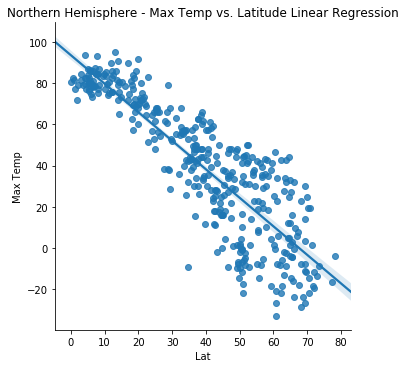

In [47]:
regression_line('Lat', 'Max Temp', north_hem, "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", "North_max")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

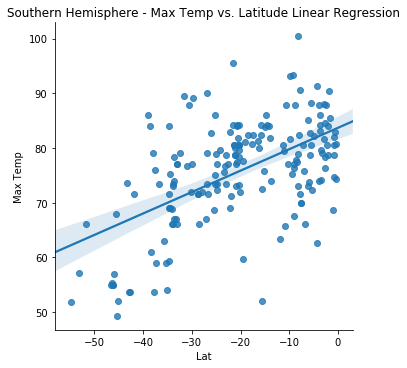

In [48]:
regression_line("Lat", "Max Temp", south_hem, "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", "south_map" )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

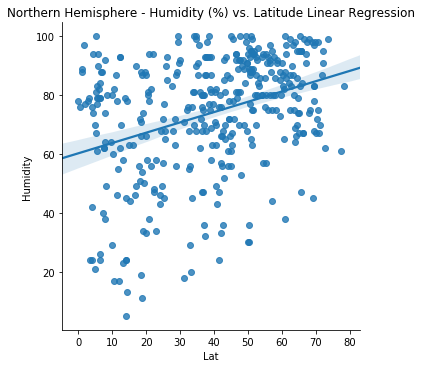

In [49]:
regression_line("Lat", "Humidity", north_hem, "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", "north_humidity" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

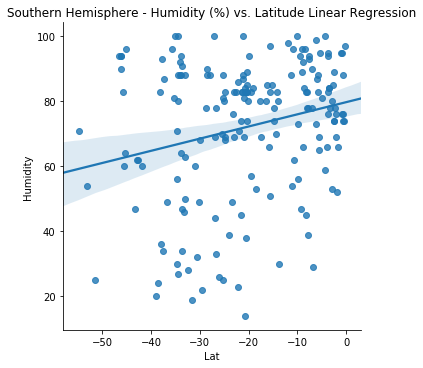

In [50]:
regression_line("Lat", "Humidity", south_hem, "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", "south_humidity" )

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

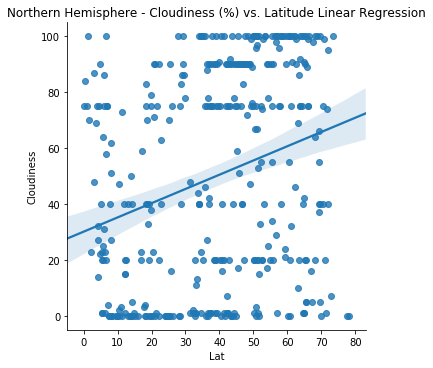

In [51]:
regression_line("Lat", "Cloudiness", north_hem, "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", "north_cloudiness" )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

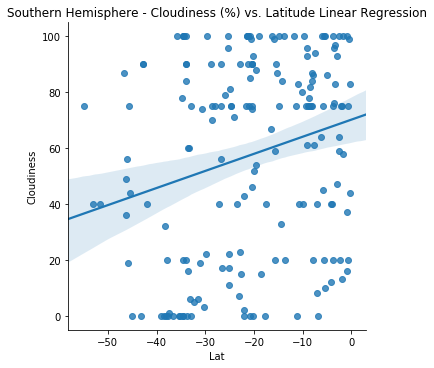

In [52]:
regression_line("Lat", "Cloudiness", south_hem, "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", "south_cloudiness" )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

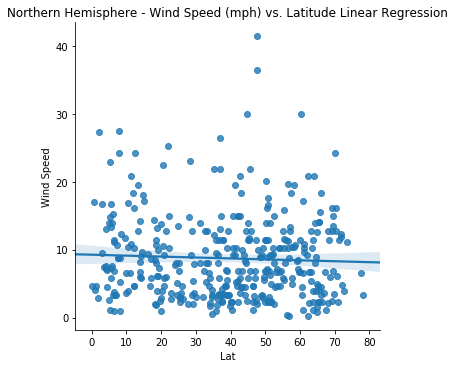

In [53]:
regression_line("Lat", "Wind Speed", north_hem, "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", "north_wind" )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

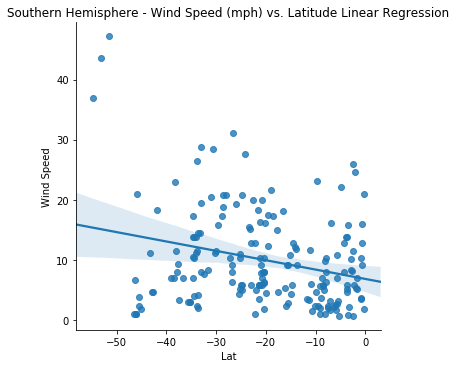

In [54]:
regression_line("Lat", "Wind Speed", south_hem, "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", "south_wind")